In [1]:
!git clone https://github.com/Heity94/AugmentedHierarchicalShrinkage.git

Cloning into 'AugmentedHierarchicalShrinkage'...
remote: Enumerating objects: 903, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 903 (delta 72), reused 70 (delta 70), pack-reused 822
Receiving objects: 100% (903/903), 124.13 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (500/500), done.
Updating files: 100% (123/123), done.


In [2]:
%cd AugmentedHierarchicalShrinkage

/content/AugmentedHierarchicalShrinkage


In [4]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


In [5]:
!pip install -e .

Obtaining file:///content/AugmentedHierarchicalShrinkage
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.2/237.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00
  Running setup.py develop for AugmentedHierarchicalShrinkage


/content/AugmentedHierarchicalShrinkage/TreeModelsFromScratch/RandomForest.py:277: UserWarning: 12 out of 800 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)
/content/AugmentedHierarchicalShrinkage/TreeModelsFromScratch/RandomForest.py:277: UserWarning: 5 out of 800 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)
/content/AugmentedHierarchicalShrinkage/TreeModelsFromScratch/RandomForest.py:277: UserWarning: 8 out of 800 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)


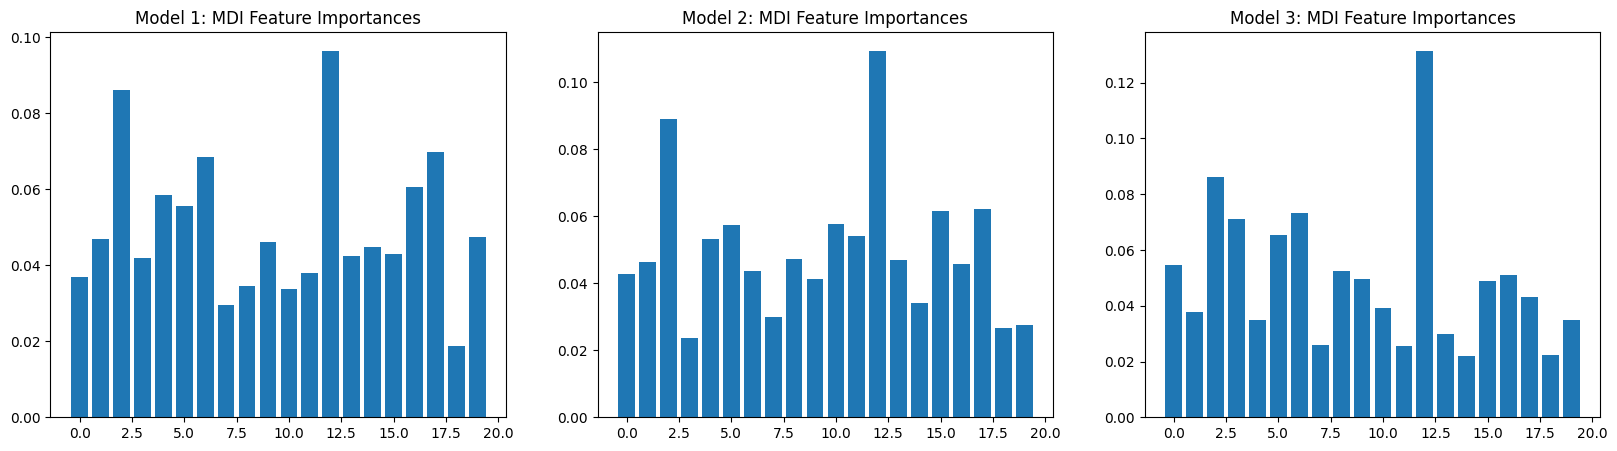

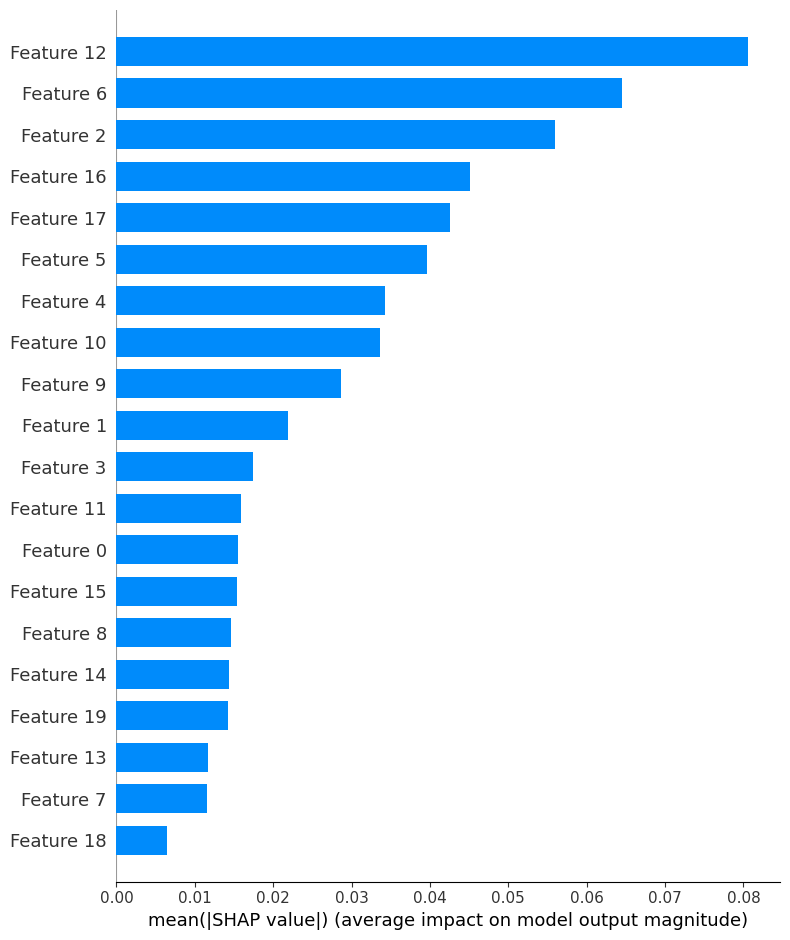

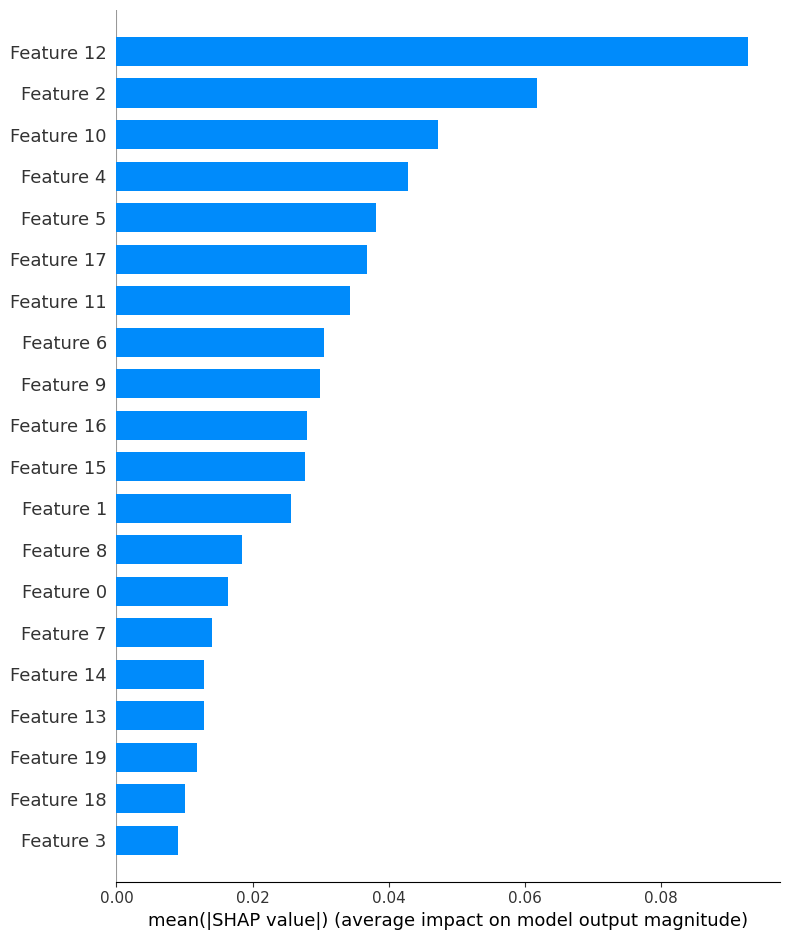

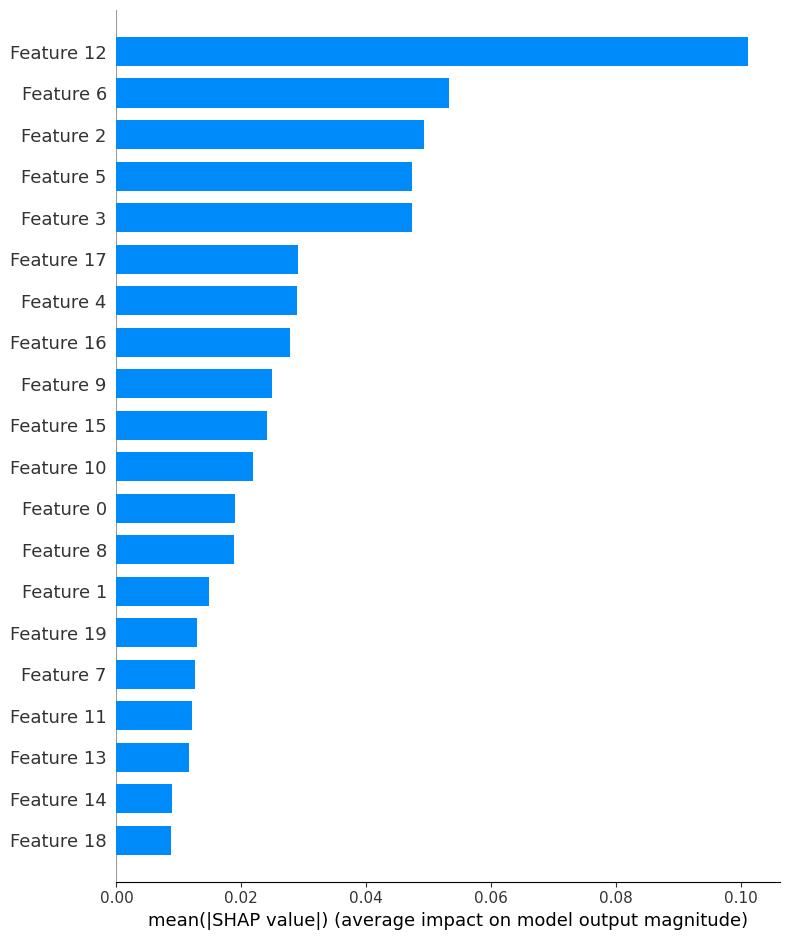

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from shap import TreeExplainer, summary_plot
import matplotlib.pyplot as plt

# Assuming a RandomForest class exists that is compatible with the provided utilities
from TreeModelsFromScratch.RandomForest import RandomForest  # Placeholder for your RandomForest implementation

# Step 1: Create a simulated dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Optional: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define and Train RandomForest Models
# Define models with different configurations
model_1 = RandomForest(treetype="classification", HShrinkage=False, HS_smSHAP=False)
model_2 = RandomForest(treetype="classification", HShrinkage=True, HS_smSHAP=False)
model_3 = RandomForest(treetype="classification", HShrinkage=True, HS_smSHAP=True)

# Train models on the simulated dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# Step 3: Compute MDI Feature Importances
mdi_importances_1 = model_1.feature_importances_
mdi_importances_2 = model_2.feature_importances_
mdi_importances_3 = model_3.feature_importances_

# Plotting the MDI feature importances for visualization
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title('Model 1: MDI Feature Importances')
plt.bar(range(len(mdi_importances_1)), mdi_importances_1)
plt.subplot(132)
plt.title('Model 2: MDI Feature Importances')
plt.bar(range(len(mdi_importances_2)), mdi_importances_2)
plt.subplot(133)
plt.title('Model 3: MDI Feature Importances')
plt.bar(range(len(mdi_importances_3)), mdi_importances_3)
plt.show()

# Step 4: Compute SHAP Feature Importances
# Prepare the models for SHAP analysis
model_for_shap_1 = model_1.export_forest_for_SHAP()
model_for_shap_2 = model_2.export_forest_for_SHAP()
model_for_shap_3 = model_3.export_forest_for_SHAP()

# Compute SHAP values
explainer_1 = TreeExplainer(model_for_shap_1)
shap_values_1 = explainer_1.shap_values(X_test)

explainer_2 = TreeExplainer(model_for_shap_2)
shap_values_2 = explainer_2.shap_values(X_test)

explainer_3 = TreeExplainer(model_for_shap_3)
shap_values_3 = explainer_3.shap_values(X_test)

# Plotting SHAP summary plots for visualization
summary_plot(shap_values_1, X_test, plot_type="bar", feature_names=[f'Feature {i}' for i in range(X.shape[1])], max_display=20, title="Model 1: SHAP Feature Importances")
summary_plot(shap_values_2, X_test, plot_type="bar", feature_names=[f'Feature {i}' for i in range(X.shape[1])], max_display=20, title="Model 2: SHAP Feature Importances")
summary_plot(shap_values_3, X_test, plot_type="bar", feature_names=[f'Feature {i}' for i in range(X.shape[1])], max_display=20, title="Model 3: SHAP Feature Importances")


In [12]:
import numbers

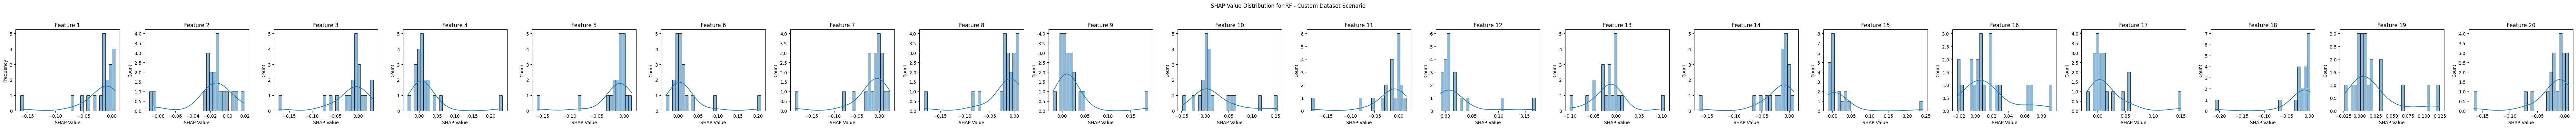

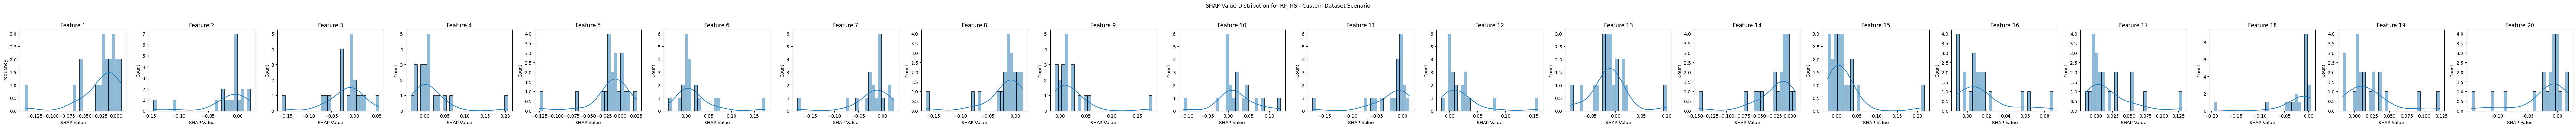

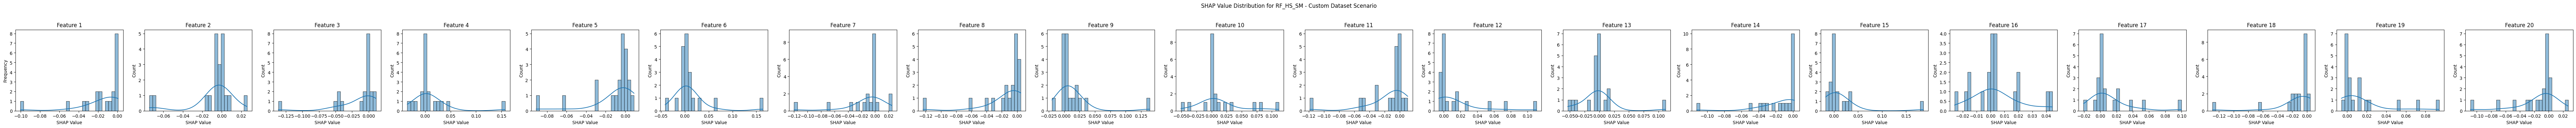

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import numbers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Simulate Strobl dataset
def simulate_data_strobl(n=120, M=100, relevance=0.15, seed=None):
    """Simulate Strobl dataset"""
    if isinstance(seed, numbers.Integral) or (seed is None):
        random_state = np.random.RandomState(seed)
    elif isinstance(seed, np.random.RandomState):
        random_state = seed

    x1 = random_state.standard_normal(size=(n, M))
    x2 = random_state.randint(1, 3, size=(n, M))
    x3 = random_state.randint(1, 5, size=(n, M))
    x4 = random_state.randint(1, 11, size=(n, M))
    x5 = random_state.randint(1, 21, size=(n, M))
    X = np.array([x1, x2, x3, x4, x5]).transpose(1, 2, 0)

    y = random_state.binomial(n=1, p=(0.5 + np.array([-1, 1])[x2-1] * relevance))
    return X, y

def process_single_simulation(X, y, lambda_hs, lambda_hs_smshap):
    rf = RandomForest(n_trees=100, treetype="classification", oob=False)
    rf_hs = RandomForest(n_trees=100, treetype="classification", HShrinkage=True, HS_lambda=lambda_hs, oob=False)
    rf_hs_smshap = RandomForest(n_trees=100, treetype="classification", HS_smSHAP=True, HS_lambda=lambda_hs_smshap, oob_SHAP=True)

    models = [rf, rf_hs, rf_hs_smshap]
    model_names = ['RF', 'RF_HS', 'RF_HS_SM']
    shap_values_list = []

    for model in models:
        model.fit(X, y)  # Assuming X, y are in the correct shape
        explainer = shap.TreeExplainer(model.export_forest_for_SHAP())  # This method needs to be implemented
        shap_values = explainer.shap_values(X)  # Compute SHAP values for the training set
        shap_values_list.append(shap_values)

    return shap_values_list, model_names


def plot_shap_distributions(shap_values, feature_names, model_name, scenario_name):
    num_features = len(feature_names)
    fig, axs = plt.subplots(1, num_features, figsize=(num_features * 4, 4))

    if num_features == 1:  # If there's only one feature, axs is not an array
        axs = [axs]

    for i, shap_vals in enumerate(shap_values):
        if i < num_features:
            sns.histplot(shap_vals, ax=axs[i], kde=True, bins=30)
            axs[i].set_title(f"{feature_names[i]}")
            axs[i].set_xlabel("SHAP Value")
            if i == 0:
                axs[i].set_ylabel("Frequency")

    plt.suptitle(f"SHAP Value Distribution for {model_name} - {scenario_name} Scenario")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



# Generate a synthetic dataset using make_classification
X, y = make_classification(n_samples=100, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# Example lambda values, adjust as needed
lambda_hs = 0.1
lambda_hs_smshap = 0.1

# Process and compute SHAP values for a single simulation (adjust as per your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
shap_values_custom, model_names = process_single_simulation(X_train, y_train, lambda_hs, lambda_hs_smshap)

# Assuming feature names are 'Feature 1', 'Feature 2', ..., 'Feature 20'
feature_names = [f"Feature {i+1}" for i in range(X_train.shape[1])]

# Visualize SHAP values
for i, model_name in enumerate(model_names):
    plot_shap_distributions(shap_values_custom[i], feature_names, model_name, "Custom Dataset")